<a href="https://colab.research.google.com/github/ANACERMIR/Capstone_Project_G13/blob/main/models/Yolo/Yolov8_Navantia_dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

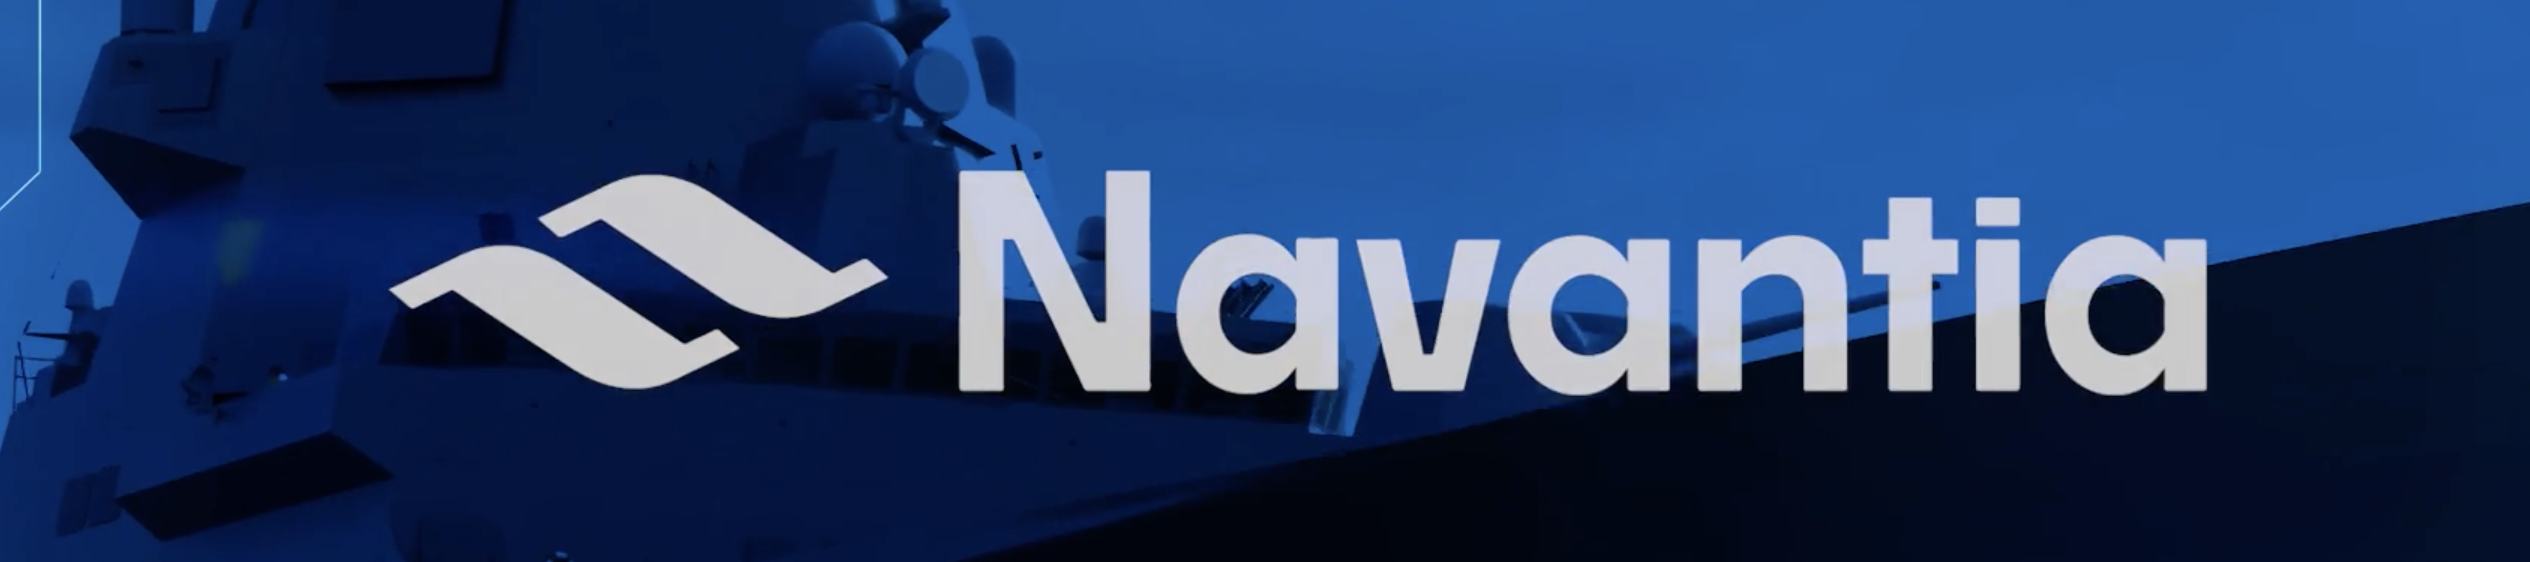

# **Yolo V8 Navantia Object Detection -- Data enhancement  -- Capstone Project**




## **Set Up**

In [ ]:
!nvidia-smi

Sun Feb 12 10:12:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#ClearML Connection
!pip install clearml
#API connection 
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
%env CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.7/967.7 KB 43.1 MB/s eta 0:00:00
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
env: CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz


## **Dataset v2.0 input**
Preprocessing: We decided to applied these techniques to reduce the amount of noise in the input data: 

*  ***Auto orienting*** the images helps to ensure that all of the images are in the correct orientation before they are fed into the YOLO model. Consider some objects as helicopters that could easily change their orientation.  
*  ***Isolating objects*** allows us to focus on the objects of interest and ignore irrelevant parts of the image. This becomes a relevant feature when dealing with submarines as we just have part of the object and the rest is noise. 

Data augmentation: To tackle the challenge of dealing with small-size images we implemented two additional data augmentation techniques: 

*  ***Horizontal Flip***: This technique helps us to increase the diversity of the training dataset. By flipping the images, we simulate the presence of objects at different positions and orientations within the image, which helps the model learn to detect objects in a wider range of situations.
* ***Cutout:*** This method allow us to increase the robustness of the model to occlusions and missing information. By randomly removing a portion of the image, we simulate the presence of occlusions or missing information in the input data, which help the model learn to detect objects even when parts of the object are missing.


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
from roboflow import Roboflow
rf = Roboflow(api_key="Ny3g4ZIR8JLlIGGc8uX6")
project = rf.workspace("capstone-project-ie").project("capstone-nv")
dataset = project.version(9).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 870.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to Capstone-NV-9 in yolov8:: 100%|██████████| 29064/29064 [00:07<00:00, 4078.54it/s]


## **Model Training**

We used the default parameters just adjusting the image size with the main objective to improve the model performance. 

After runing some experimentation we found that 20 epochs was the optimal number after that the model main metrics mantain steady.    

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 name=nav_dataV2 lr0=0.001

/content
100% 83.7M/83.7M [00:14<00:00, 6.02MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Capstone-NV-9/data.yaml, epochs=20, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=nav_dataV2, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [ ]:
!ls /content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2

args.yaml					    val_batch0_labels.jpg
confusion_matrix.png				    val_batch0_pred.jpg
events.out.tfevents.1676197192.da2bb5da4e35.2024.0  val_batch1_labels.jpg
F1_curve.png					    val_batch1_pred.jpg
P_curve.png					    val_batch2_labels.jpg
PR_curve.png					    val_batch2_pred.jpg
R_curve.png					    weights
results.csv


## **Results**

As we can observe in the confusion matrix this model succesfully achieved to predict the class and the location of all the classess with a really high precision. 

/content


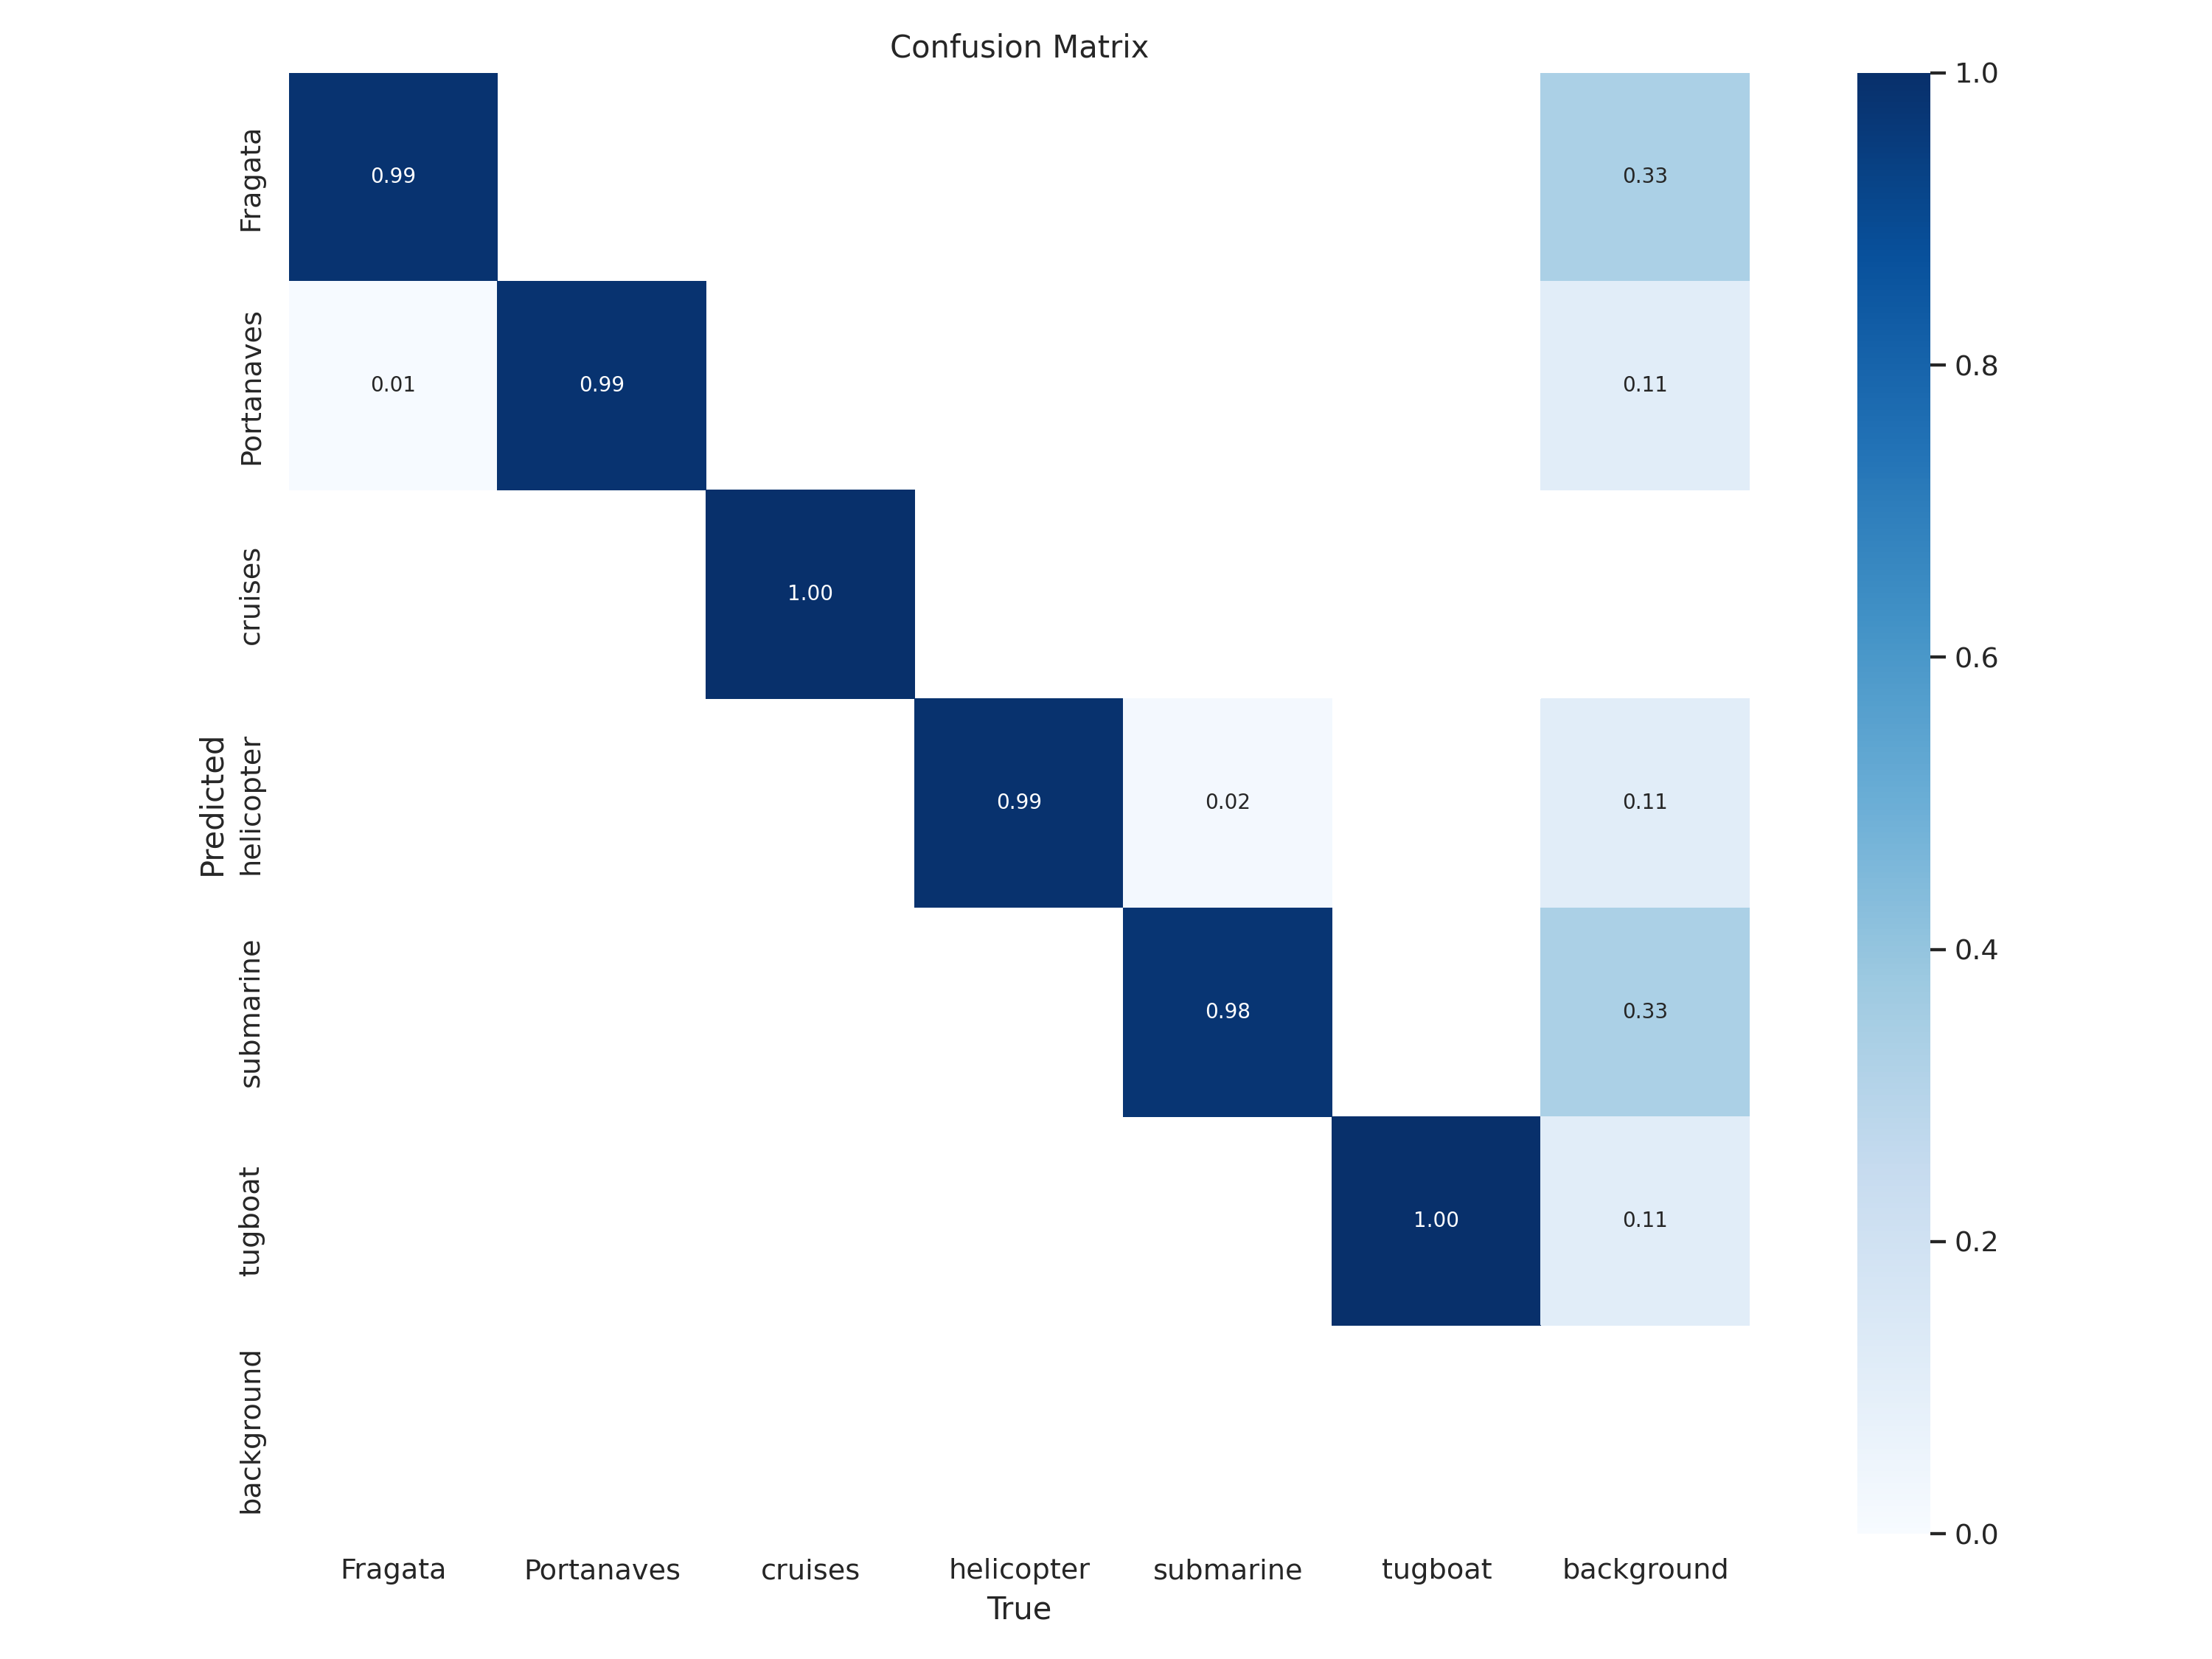

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2/confusion_matrix.png', width=600)

/content


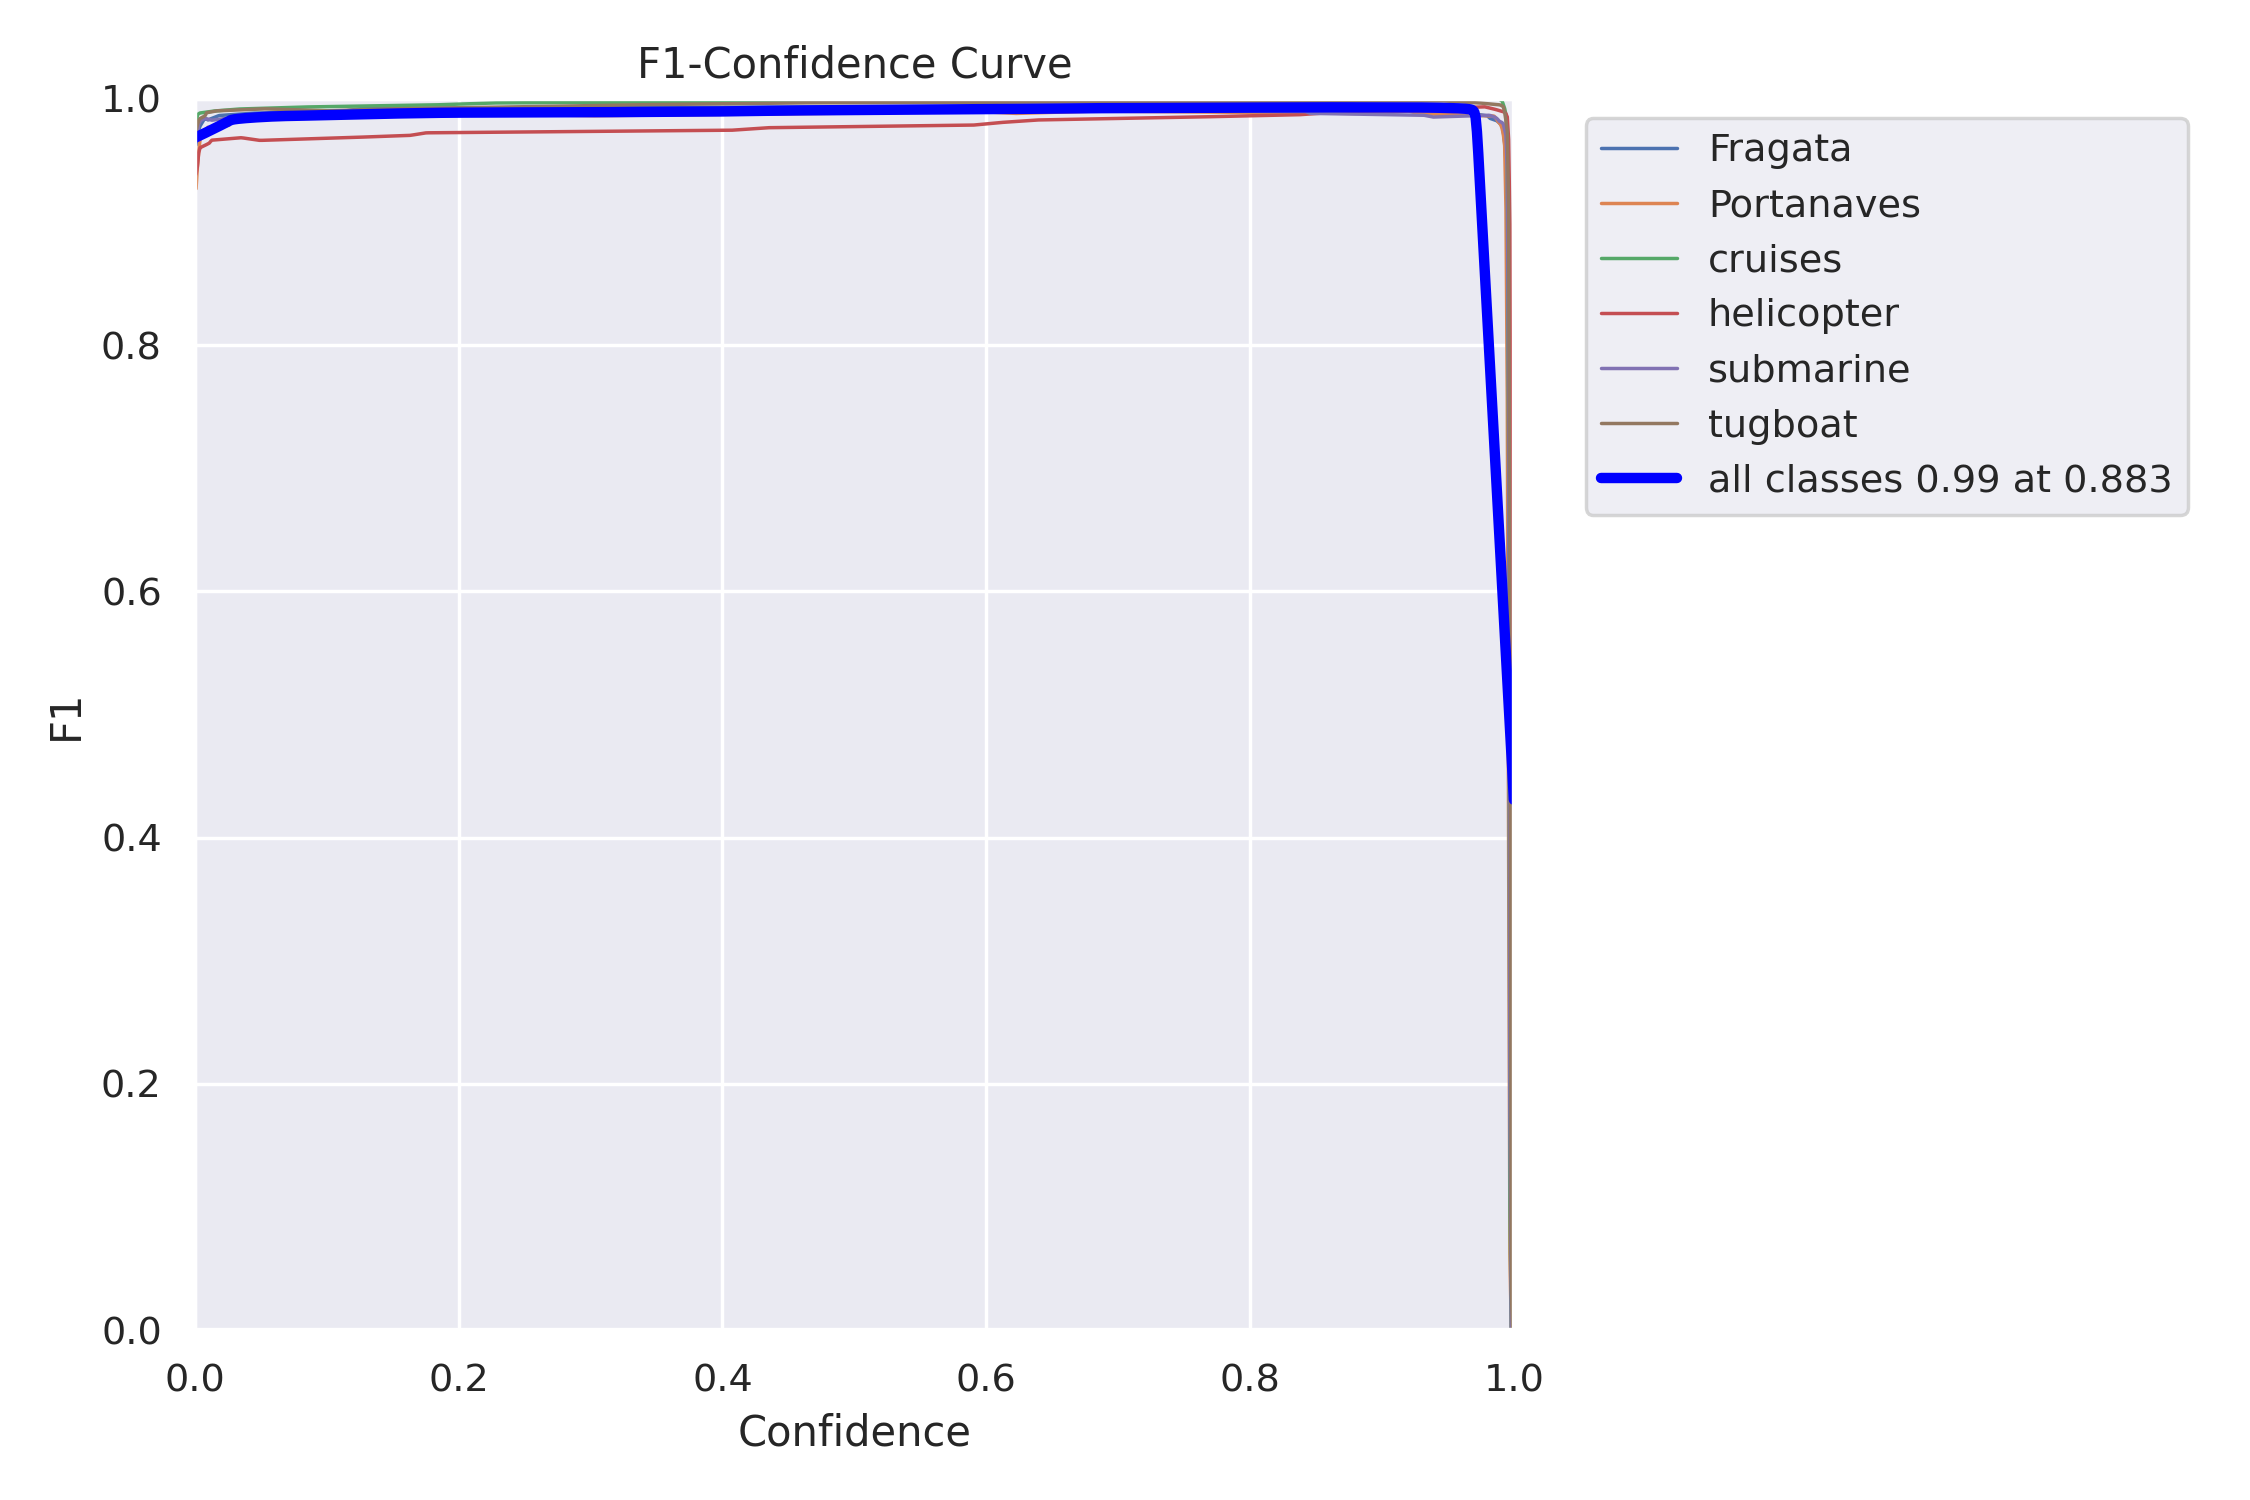

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2/F1_curve.png', width=600)

/content


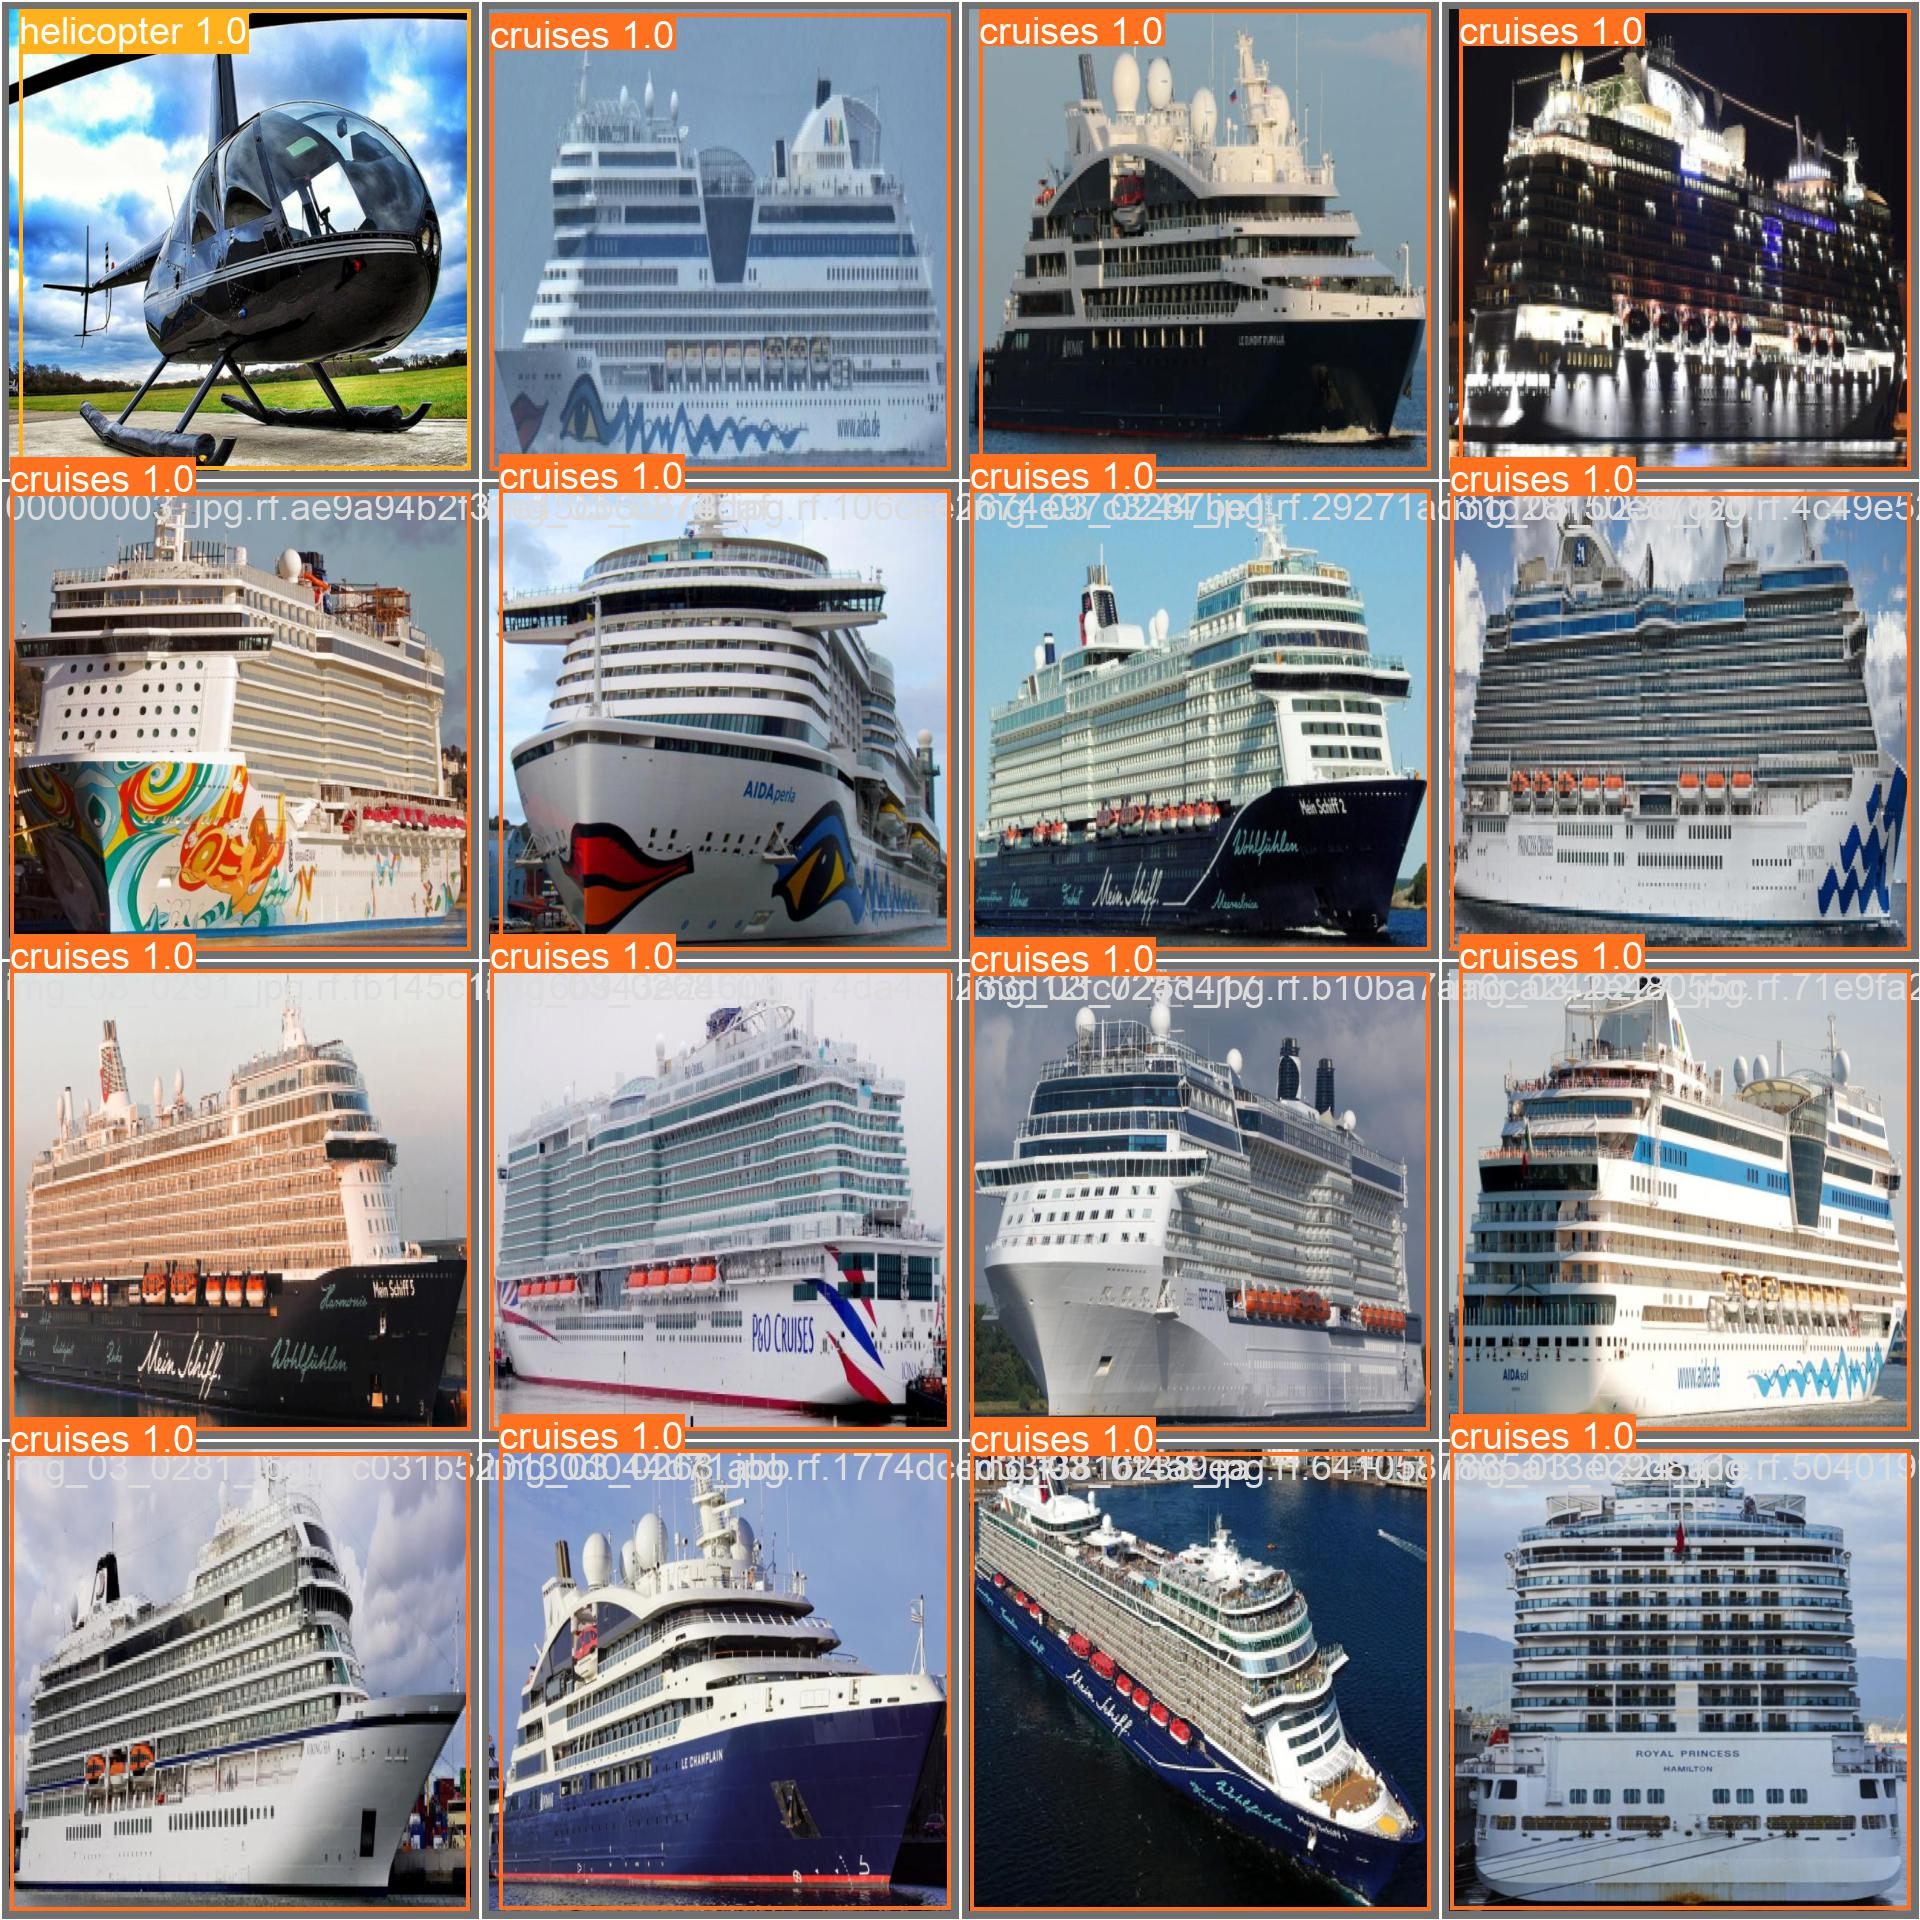

In [ ]:
%cd {HOME}
Image(filename=f'/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2/val_batch0_pred.jpg', width=600)

## **Model Validation**

The results on the validation model prove us that we are not overfitting and that the accuracy of our model is really high. 

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model=/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Capstone-NV-9/valid/labels.cache... 1687 images, 0 backgrounds, 0 corrupt: 100% 1687/1687 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 106/106 [01:43<00:00,  1.02it/s]
                   all       1687       1687      0.996       0.99      0.995      0.995
               Fragata       1687        256      0.996      0.993      0.995      0.995
            Portanaves       1687        254      0.997       0.98      0.995      0.995
               cruises       1687        299      0.999          1      0.995      0.995
            helicopter       1687        231      0.989      0.991      0.995      0.994
             submarine       1687        342      0.997      0.978      0.995      0.995
               tugboa

## **Inference Enhanced Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
image 1/843 /content/datasets/Capstone-NV-9/test/images/00000013_jpg.rf.5317052ff6c0b4399ae1710ec1222f0c.jpg: 800x800 1 helicopter, 90.5ms
image 2/843 /content/datasets/Capstone-NV-9/test/images/00000030_jpg.rf.3f9375ddbc095968230aa951f0696ee9.jpg: 800x800 1 helicopter, 64.1ms
image 3/843 /content/datasets/Capstone-NV-9/test/images/00000080_jpg.rf.1088ba31380f60a74fb7addfaa502680.jpg: 800x800 1 helicopter, 60.6ms
image 4/843 /content/datasets/Capstone-NV-9/test/images/00000088_jpg.rf.8830b9ec8d0873cdc11f2bc58e185ea7.jpg: 800x800 1 helicopter, 62.7ms
image 5/843 /content/datasets/Capstone-NV-9/test/images/00000094_png.rf.f7beb6dcd6e705587ea85dee1819544d.jpg: 800x800 1 helicopter, 63.1ms
image 6/843 /content/datasets/Capstone-NV-9/test/images/00000099_jpg.rf.3068998b2a90de9e5b5842d83ba1321a.jpg: 800x800 1 helicop

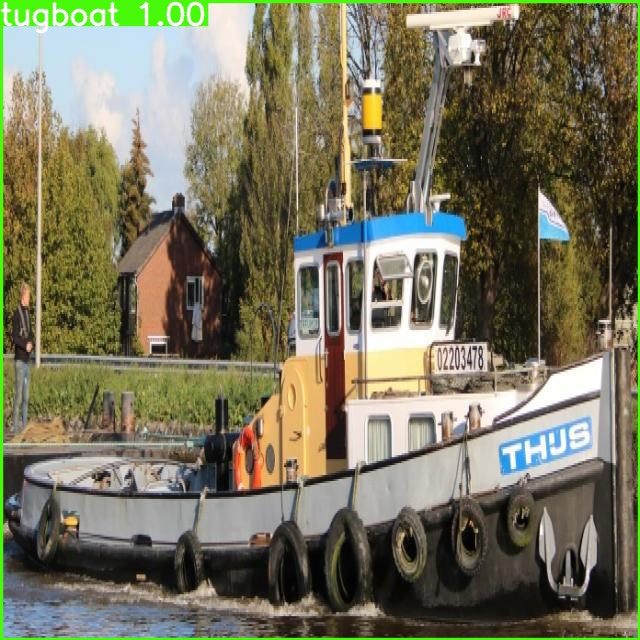

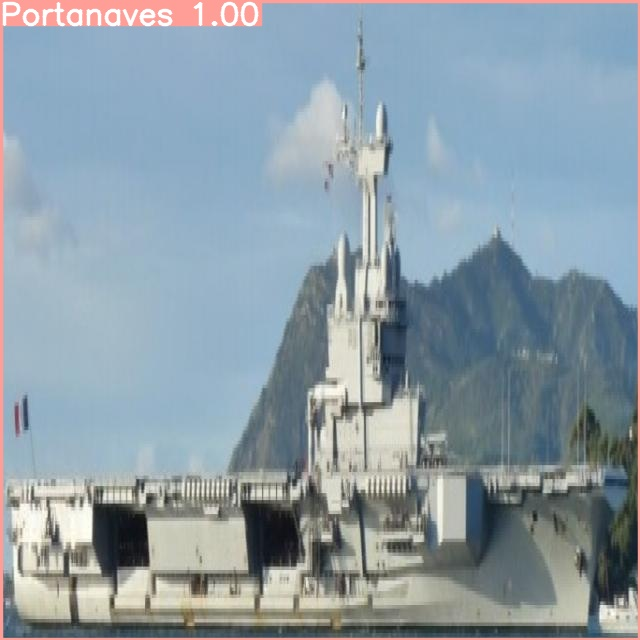

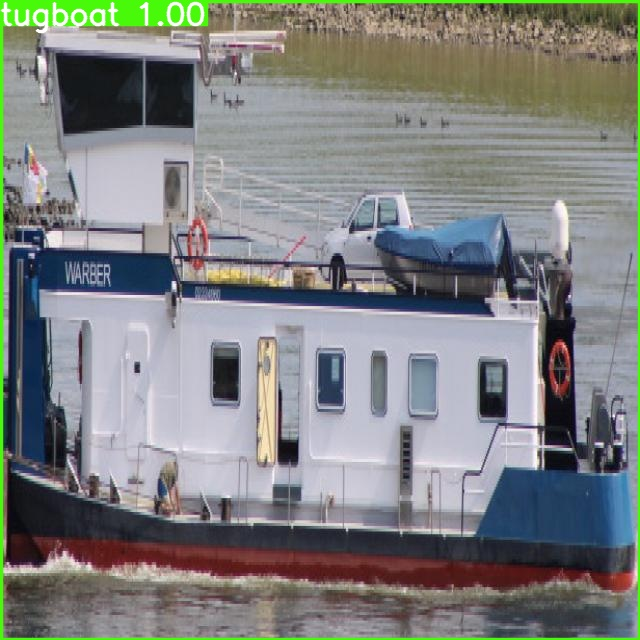

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

We uploaded our model weights to Roboflow Deploy to use our trained weights on the platform.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"/content/drive/MyDrive/Capstone_Project/runs/detect/nav_dataV2")

## Save model

In [ ]:
!zip -r runs.zip /content/runs

from google.colab import files
files.download("/content/runs.zip")

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/img_04_1490_jpg.rf.08b8f23d3bcc6243bb0463d75743fa78.jpg (deflated 5%)
  adding: content/runs/detect/predict/img_01_0309_jpg.rf.34274823ab05db61b78b16b99b2aa96c.jpg (deflated 6%)
  adding: content/runs/detect/predict/img_04_1171_jpg.rf.e7176f18a0b93b58890886af9070fc54.jpg (deflated 5%)
  adding: content/runs/detect/predict/img_03_0846_jpg.rf.0a75e19211afc2a8e9496c72fde6d5a9.jpg (deflated 6%)
  adding: content/runs/detect/predict/img_00_0554_jpg.rf.50e672853ac49f3aec0b3a305bf0d242.jpg (deflated 5%)
  adding: content/runs/detect/predict/img_03_1048_jpg.rf.958970727c60bf182d77f5c887a0ba87.jpg (deflated 5%)
  adding: content/runs/detect/predict/00000013_jpg.rf.5317052ff6c0b4399ae1710ec1222f0c.jpg (deflated 7%)
  adding: content/runs/detect/predict/00000914_jpg.rf.b3c5bd416a914b419dd7b266c2b957d5.jpg (deflated 4%)
  adding: co

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>